Caio Uehara Martins <br>
nUSP 13672022 <br>
DCM - FFCLRP <br>
Professor: EVANDROE.S.RUIZ <br>

*Trabalho 2 - Algoritmos e Estruturas de Dados II*

In [45]:
#bibliotecas de sistema
import os

#bibilioteca gráfica para grafos
import networkx as nx
import matplotlib.pyplot as plt

#biblioteca de estruturação de dados
import pandas as pd

#Número aleatório
import random

c:\Users\Tigrocomputer\anaconda3\envs\aed2grafos\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


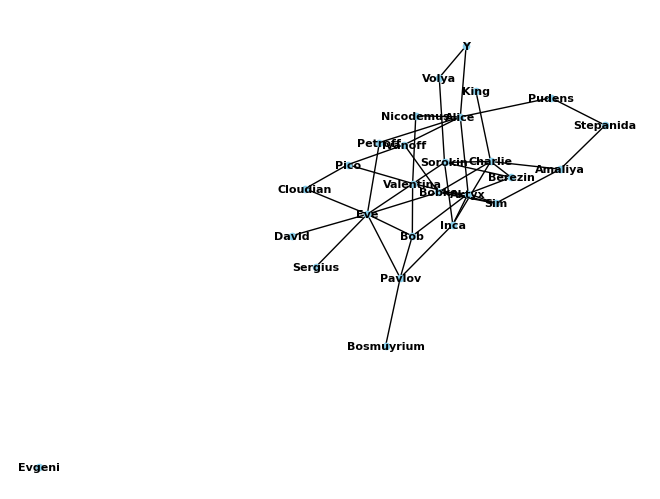

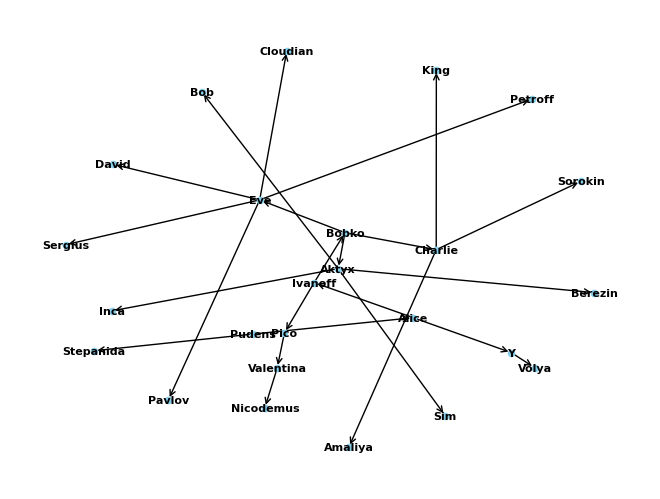

In [46]:
#explorando o networkx, criando um grafo aleatório e uma árvore de busca profunda

#criando grafo de uma rede social fictícia para uso dos algoritmos
G = nx.Graph()

# Adicionando nós (pessoas) ao grafo
lista_nomes = ["Alice", "Bob", "Charlie", "David", "Eve","Volya","Sorokin","King","Pico","Ivanoff","Stepanida","Petroff","Bobko","Sergius","Berezin","Aktyx",
               "Nicodemus","Bosmuyrium","Aktyx","Y","Amaliya","Cloudian","Sim","Pavlov","Valentina","Inca","Pudens","Evgeni"]

G.add_nodes_from(lista_nomes)

# Adicionando relações (arestas) entre as pessoas
def createRandomEdges(n):
    tamanho = len(lista_nomes)
    
    for i in range(0, n):
        numero_aleatorio = random.randrange(0, tamanho - 1)
        numero_aleatorio2 = random.randrange(0, tamanho - 1)
        
        if(numero_aleatorio != numero_aleatorio2): 
            G.add_edge(lista_nomes[numero_aleatorio], lista_nomes[numero_aleatorio2])
    
    
createRandomEdges(50)

# Desenhando o grafo
def draw(graph, *args):
    common_params = {
        "with_labels": True, 
        "font_weight": 'bold', 
        "node_size": 20, 
        "node_color": 'skyblue', 
        "font_size": 8, 
        "font_color": 'black', 
        "arrowsize": 10, 
        "arrowstyle": '->'
    }
    
    if args:
        nx.draw(graph, args[0], **common_params)
    else:
        nx.draw(graph, **common_params)
        
    #Exibe o grafo
    plt.show()
    
pos = nx.spring_layout(G)  # Posicionamento dos nós
draw(G, pos)

#Árvore DFS
DFS = nx.dfs_tree(G, "Pudens", 5)

draw(DFS)

In [47]:
#carregando os CSV com os dados da rede "Quakers"

quakers_nodelist = pd.read_csv(os.path.relpath("../data/quakers_nodelist.csv"))
quakers_edgelist = pd.read_csv(os.path.relpath("../data/quakers_edgelist.csv"))

display(quakers_nodelist)
display(quakers_edgelist)

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


c:\Users\Tigrocomputer\anaconda3\envs\aed2grafos\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


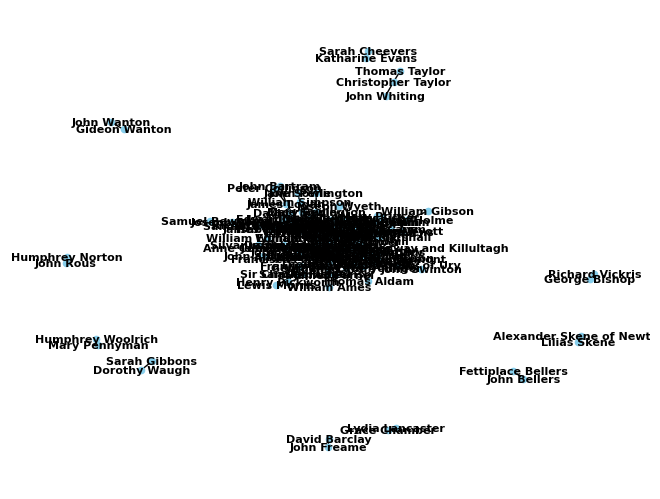

In [48]:
#criando o grafo da rede

Q = nx.Graph()

Q.add_nodes_from( list(quakers_nodelist["Name"]))
Q.add_edges_from( list(quakers_edgelist.itertuples(index=False, name=None)) )

draw(Q)